In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/machine-learning-band-gap-prediction/sample_submission.csv
/kaggle/input/machine-learning-band-gap-prediction/train.csv
/kaggle/input/machine-learning-band-gap-prediction/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/machine-learning-band-gap-prediction/train.csv')
test = pd.read_csv('/kaggle/input/machine-learning-band-gap-prediction/test.csv')
train.head()

id                                            polymer  fp_mqns_1  \
0   789  [*]C(=O)c1ccc2c(c1)C(=O)N(c1ccc(C3(c4ccc(N5C(=...          1   
1  2983  [*]CCCCCOC(=O)c1ccc(C(=O)NCCCCCCNC(=O)c2ccc(C(...          1   
2  1037                                         [*]CNON[*]          1   
3  1068    [*]Oc1ccc(-c2ccc(OC(=O)CCCCCCCCC([*])=O)cc2)cc1          1   
4  3322                               [*]OC1(O)CCCC([*])C1          1   

   fp_mqns_2  fp_mqns_3  fp_mqns_4  fp_mqns_5  fp_mqns_6  fp_mqns_7  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   fp_mqns_8  ...  fp_o_desc_chi1n  fp_o_desc_chi1v  fp_o_desc_chi2n  \
0   0.000000  ...         0.377963         0.377963         0.300679   
1   0.074074  ...         0.449784         0.449784         0.310747   
2   2.000000  ...         1.093414         1.093414         0.536822   
3   0.000000  ...         0.423286         0.423286         0.299429   
4   0.000000  ...         0.530491         0.530491         0.458749   

   fp_o_desc_chi2v  fp_o_desc_chi3n  fp_o_desc_chi3v  fp_o_desc_chi4n  \
0         0.300679         0.245471         0.245471         0.192698   
1         0.310747         0.209719         0.209719         0.132236   
2         0.536822         0.266744         0.266744         0.136920   
3         0.299429         0.203747         0.203747         0.136631   
4         0.458749         0.329913         0.329913         0.269098   

   fp_o_desc_chi4v  fp_o_desc_HallKierAlpha  band_gap  
0         0.192698                 0.160238    2.3311  
1         0.132236                 0.136296    4.3426  
2         0.136920                 0.120000    5.3302  
3         0.136631                 0.119091    4.5699  
4         0.269098                 0.013333    6.0531  

[5 rows x 87 columns]

# Data Pre-Processing

In [3]:
train.describe()

id  fp_mqns_1    fp_mqns_2   fp_mqns_3    fp_mqns_4  \
count  2534.000000     2534.0  2534.000000  2534.00000  2534.000000   
mean   1710.470797        1.0     0.055032     0.01115     0.002470   
std     968.637489        0.0     0.252474     0.07151     0.029294   
min       1.000000        1.0     0.000000     0.00000     0.000000   
25%     884.250000        1.0     0.000000     0.00000     0.000000   
50%    1723.500000        1.0     0.000000     0.00000     0.000000   
75%    2548.750000        1.0     0.000000     0.00000     0.000000   
max    3377.000000        1.0     2.333333     1.50000     1.000000   

         fp_mqns_5    fp_mqns_6    fp_mqns_7    fp_mqns_8    fp_mqns_9  ...  \
count  2534.000000  2534.000000  2534.000000  2534.000000  2534.000000  ...   
mean      0.000609     0.033564     0.000693     0.061983     0.027791  ...   
std       0.020997     0.094183     0.006922     0.128136     0.071108  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.100000     0.000000  ...   
max       1.000000     1.000000     0.125000     2.000000     1.000000  ...   

       fp_o_desc_chi1n  fp_o_desc_chi1v  fp_o_desc_chi2n  fp_o_desc_chi2v  \
count      2534.000000      2534.000000      2534.000000      2534.000000   
mean          0.464155         0.499494         0.341241         0.386593   
std           0.081286         0.126236         0.061661         0.136319   
min           0.284699         0.244418         0.141931         0.141931   
25%           0.403169         0.418513         0.299175         0.313162   
50%           0.453044         0.484089         0.328039         0.351935   
75%           0.511847         0.531963         0.363460         0.416613   
max           1.329670         1.950662         0.678719         2.529143   

       fp_o_desc_chi3n  fp_o_desc_chi3v  fp_o_desc_chi4n  fp_o_desc_chi4v  \
count      2534.000000      2534.000000      2534.000000      2534.000000   
mean          0.230217         0.270344         0.155033         0.188956   
std           0.043694         0.107586         0.041547         0.097994   
min           0.063623         0.063623         0.028461         0.028461   
25%           0.203337         0.214198         0.130345         0.139189   
50%           0.223038         0.238886         0.147543         0.161584   
75%           0.245470         0.296156         0.169577         0.206964   
max           0.590197         2.156654         0.612820         1.695477   

       fp_o_desc_HallKierAlpha     band_gap  
count              2534.000000  2534.000000  
mean                  0.121631     4.551584  
std                   0.063712     1.556705  
min                   0.000000     0.069000  
25%                   0.077143     3.285825  
50%                   0.122667     4.636900  
75%                   0.161870     5.835100  
max                   0.770000     9.862700  

[8 rows x 86 columns]

In [4]:
train.dtypes

id                           int64
polymer                     object
fp_mqns_1                    int64
fp_mqns_2                  float64
fp_mqns_3                  float64
                            ...   
fp_o_desc_chi3v            float64
fp_o_desc_chi4n            float64
fp_o_desc_chi4v            float64
fp_o_desc_HallKierAlpha    float64
band_gap                   float64
Length: 87, dtype: object

In [5]:
test.head()

id                                           polymer  fp_mqns_1  \
0   402                              [*]CCN[Si](C)(C)N[*]          1   
1   321  [*]C=Cc1ccc(C=Cc2nc3cc4nc([*])[nH]c4cc3[nH]2)cc1          1   
2   457                       [*]CC([*])C(=O)c1ccc(Br)cc1          1   
3   879                      [*]C(S1)=CC=C1C(=S)OC(=S)[*]          1   
4  1536              [*]c1cccc(-c2ccc(-c3ccc([*])s3)s2)n1          1   

   fp_mqns_2  fp_mqns_3  fp_mqns_4  fp_mqns_5  fp_mqns_6  fp_mqns_7  \
0        0.0        0.0   0.000000        0.0   0.000000        0.0   
1        0.0        0.0   0.000000        0.0   0.000000        0.0   
2        0.0        0.0   0.111111        0.0   0.000000        0.0   
3        0.0        0.0   0.000000        0.0   0.500000        0.0   
4        0.0        0.0   0.000000        0.0   0.153846        0.0   

   fp_mqns_8  ...  fp_o_desc_chi1  fp_o_desc_chi1n  fp_o_desc_chi1v  \
0        0.5  ...        0.797200         0.673409         1.425826   
1        0.0  ...        0.601635         0.398572         0.398572   
2        0.0  ...        0.584644         0.395481         0.483592   
3        0.0  ...        0.796636         0.436934         0.711731   
4        0.0  ...        0.607938         0.389791         0.516013   

   fp_o_desc_chi2n  fp_o_desc_chi2v  fp_o_desc_chi3n  fp_o_desc_chi3v  \
0         0.612559         1.596830         0.295143         0.830742   
1         0.301130         0.301130         0.216130         0.216130   
2         0.306438         0.408180         0.221428         0.280169   
3         0.299270         0.596946         0.192372         0.505789   
4         0.283723         0.449150         0.204320         0.387516   

   fp_o_desc_chi4n  fp_o_desc_chi4v  fp_o_desc_HallKierAlpha  
0         0.191847         0.575542                 0.034221  
1         0.152212         0.152212                 0.174444  
2         0.156136         0.185506                 0.070000  
3         0.118563         0.338875                 0.053333  
4         0.144337         0.299251                 0.111538  

[5 rows x 86 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def Encoder(x):
    encoder = LabelEncoder()
    to_encoder = ['polymer']
    for col in to_encoder:
        x[col] = encoder.fit_transform(x[col]) 

Encoder(train)
Encoder(test)

In [7]:
train.head(10)

id  polymer  fp_mqns_1  fp_mqns_2  fp_mqns_3  fp_mqns_4  fp_mqns_5  \
0   789      160          1        0.0   0.000000        0.0        0.0   
1  2983     1228          1        0.0   0.000000        0.0        0.0   
2  1037     1482          1        0.0   0.000000        0.0        0.0   
3  1068     1972          1        0.0   0.000000        0.0        0.0   
4  3322     1899          1        0.0   0.000000        0.0        0.0   
5   867     1154          1        0.0   0.000000        0.0        0.0   
6  3155     1485          1        0.0   0.000000        0.0        0.0   
7  1221      381          1        0.0   0.000000        0.0        0.0   
8  3080     1940          1        0.0   0.333333        0.0        0.0   
9   272     1679          1        0.0   0.000000        0.0        0.0   

   fp_mqns_6  fp_mqns_7  fp_mqns_8  ...  fp_o_desc_chi1n  fp_o_desc_chi1v  \
0        0.0   0.000000   0.000000  ...         0.377963         0.377963   
1        0.0   0.000000   0.074074  ...         0.449784         0.449784   
2        0.0   0.000000   2.000000  ...         1.093414         1.093414   
3        0.0   0.000000   0.000000  ...         0.423286         0.423286   
4        0.0   0.000000   0.000000  ...         0.530491         0.530491   
5        0.0   0.076923   0.153846  ...         0.543941         0.738132   
6        0.0   0.000000   0.142857  ...         0.473808         0.473808   
7        0.0   0.000000   0.000000  ...         0.424300         0.424300   
8        0.0   0.083333   0.000000  ...         0.457968         0.706035   
9        0.0   0.000000   0.200000  ...         0.534972         0.534972   

   fp_o_desc_chi2n  fp_o_desc_chi2v  fp_o_desc_chi3n  fp_o_desc_chi3v  \
0         0.300679         0.300679         0.245471         0.245471   
1         0.310747         0.310747         0.209719         0.209719   
2         0.536822         0.536822         0.266744         0.266744   
3         0.299429         0.299429         0.203747         0.203747   
4         0.458749         0.458749         0.329913         0.329913   
5         0.409886         0.678201         0.255741         0.435683   
6         0.324912         0.324912         0.207315         0.207315   
7         0.359338         0.359338         0.298398         0.298398   
8         0.327079         0.572399         0.209251         0.444399   
9         0.367724         0.367724         0.236624         0.236624   

   fp_o_desc_chi4n  fp_o_desc_chi4v  fp_o_desc_HallKierAlpha  band_gap  
0         0.192698         0.192698                 0.160238    2.3311  
1         0.132236         0.132236                 0.136296    4.3426  
2         0.136920         0.136920                 0.120000    5.3302  
3         0.136631         0.136631                 0.119091    4.5699  
4         0.269098         0.269098                 0.013333    6.0531  
5         0.152226         0.273607                 0.063846    5.9900  
6         0.131893         0.131893                 0.207143    5.0674  
7         0.242782         0.242782                 0.118750    4.5629  
8         0.134079         0.334667                 0.062500    4.5449  
9         0.151137         0.151137                 0.104000    6.0464  

[10 rows x 87 columns]

In [8]:
train = train.drop(['id'],axis = 1)
test_id = test['id']
test = test.drop(['id'],axis = 1)

In [9]:
train.isna().sum()

polymer                    0
fp_mqns_1                  0
fp_mqns_2                  0
fp_mqns_3                  0
fp_mqns_4                  0
                          ..
fp_o_desc_chi3v            0
fp_o_desc_chi4n            0
fp_o_desc_chi4v            0
fp_o_desc_HallKierAlpha    0
band_gap                   0
Length: 86, dtype: int64

In [10]:
test.isna().sum()

polymer                    0
fp_mqns_1                  0
fp_mqns_2                  0
fp_mqns_3                  0
fp_mqns_4                  0
                          ..
fp_o_desc_chi3n            0
fp_o_desc_chi3v            0
fp_o_desc_chi4n            0
fp_o_desc_chi4v            0
fp_o_desc_HallKierAlpha    0
Length: 85, dtype: int64

# Data Visualisation

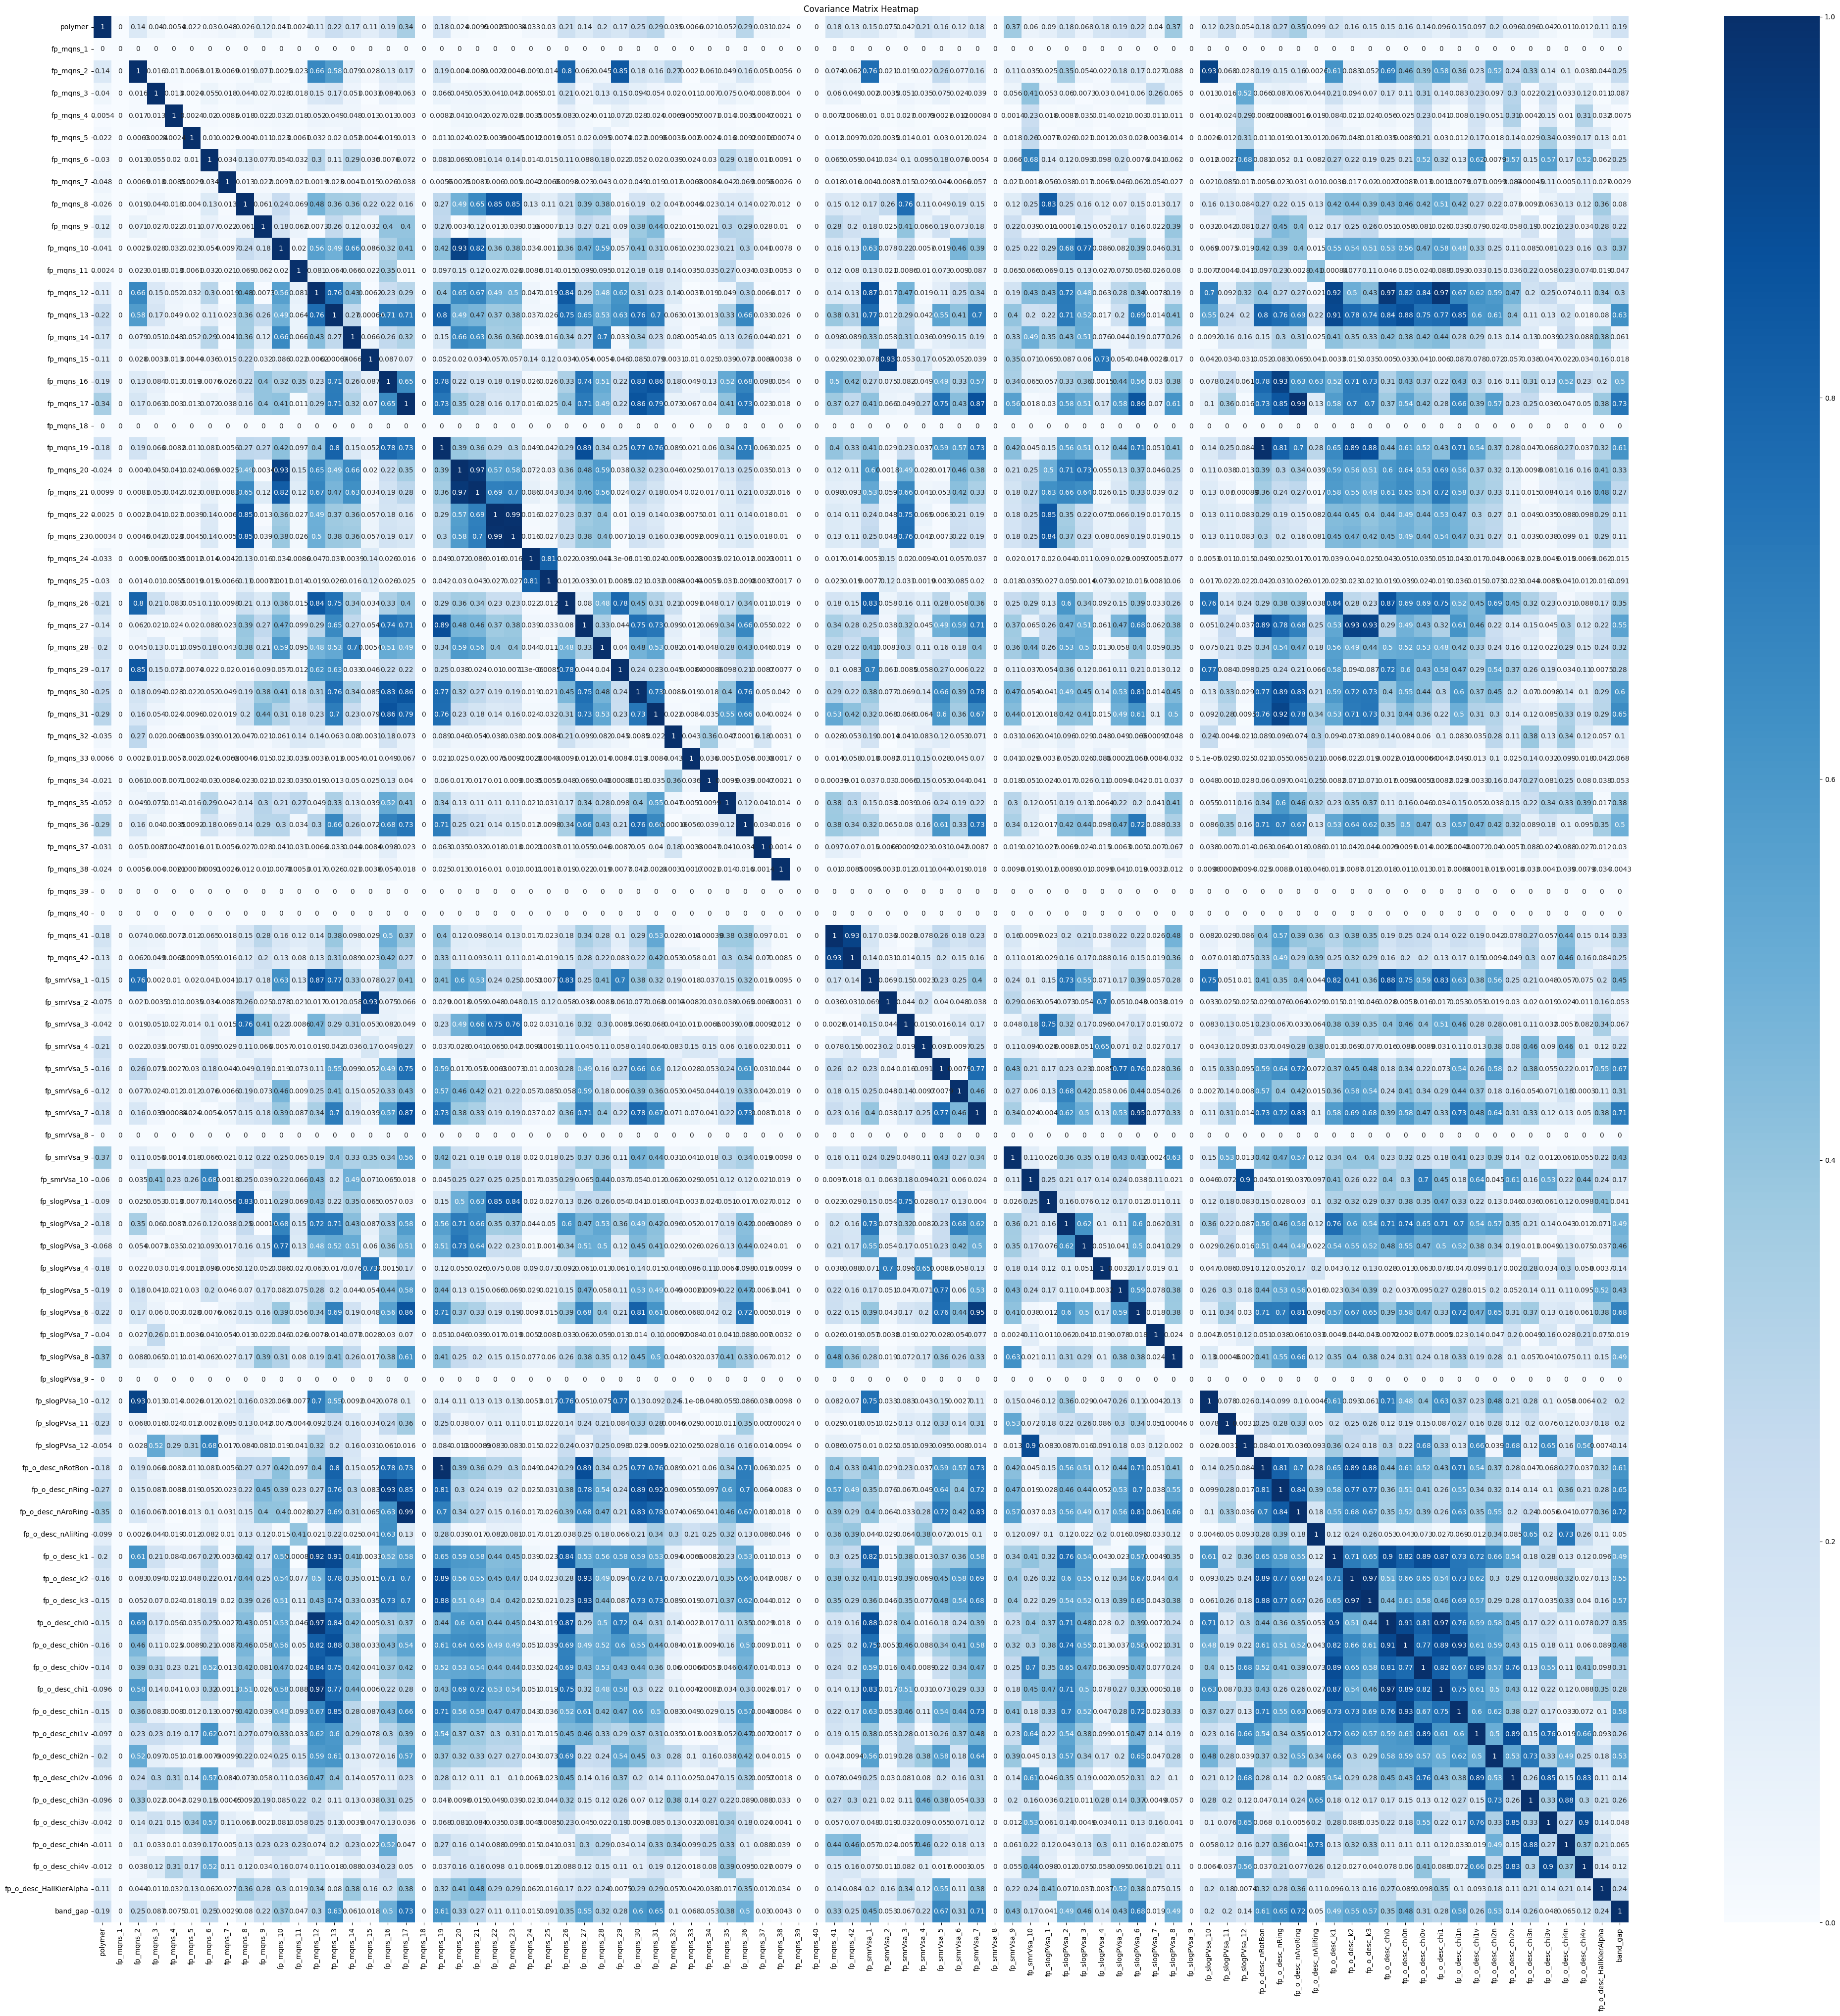

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
scaler= StandardScaler()

trainup = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(50, 50))
sns.heatmap(cov_matrix, annot=True, cmap='Blues')
plt.title('Covariance Matrix Heatmap')
plt.show()

<Axes: xlabel='fp_o_desc_HallKierAlpha', ylabel='band_gap'>

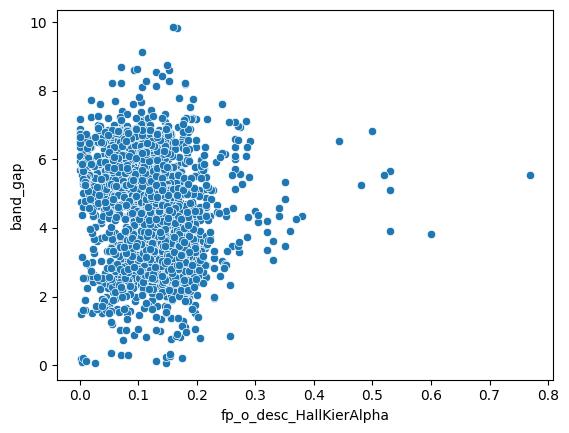

In [12]:
sns.scatterplot(data = train, x = 'fp_o_desc_HallKierAlpha', y = 'band_gap')

<Axes: xlabel='fp_o_desc_chi4n', ylabel='band_gap'>

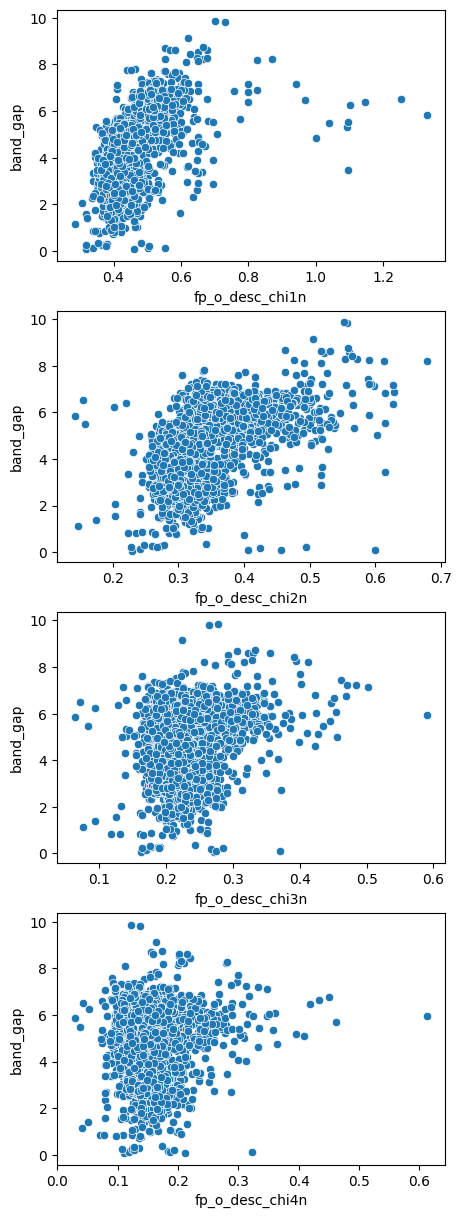

In [13]:
fig,ax = plt.subplots(4,1,figsize=(5,15))
sns.scatterplot(data=train,x='fp_o_desc_chi1n',y='band_gap',ax=ax[0])
sns.scatterplot(data=train,x='fp_o_desc_chi2n',y='band_gap',ax=ax[1])
sns.scatterplot(data=train,x='fp_o_desc_chi3n',y='band_gap',ax=ax[2])
sns.scatterplot(data=train,x='fp_o_desc_chi4n',y='band_gap',ax=ax[3])

<Axes: xlabel='fp_o_desc_chi4v', ylabel='band_gap'>

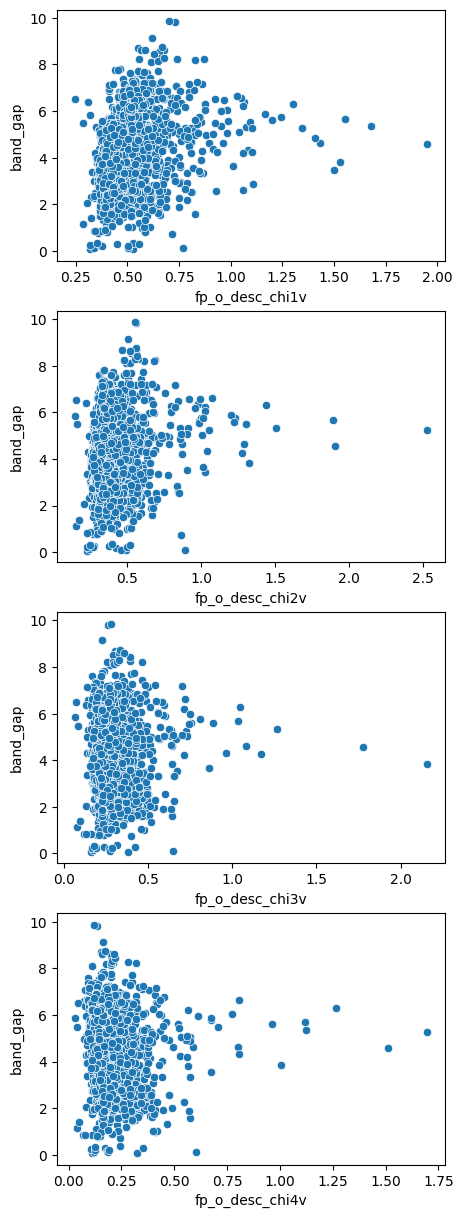

In [14]:
fig,ax = plt.subplots(4,1,figsize=(5,15))
sns.scatterplot(data=train,x='fp_o_desc_chi1v',y='band_gap',ax=ax[0])
sns.scatterplot(data=train,x='fp_o_desc_chi2v',y='band_gap',ax=ax[1])
sns.scatterplot(data=train,x='fp_o_desc_chi3v',y='band_gap',ax=ax[2])
sns.scatterplot(data=train,x='fp_o_desc_chi4v',y='band_gap',ax=ax[3])

In [15]:
X = train.drop(['band_gap'], axis = 1)
y = train['band_gap']

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2027, 85), (507, 85), (2027,), (507,))

# Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.616922818544964

# Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=42)

In [20]:
y_pred_gb = gb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gb))
rmse

0.6079483518982297

# XGB Regressor

In [21]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
y_pred_xgb = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
rmse

0.6066355133909174

# Light GBM Regressor

In [23]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [24]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [25]:
num_round = 500
lgb_reg = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11872
[LightGBM] [Info] Number of data points in the train set: 2027, number of used features: 73
[LightGBM] [Info] Start training from score 4.556972


In [26]:
y_pred_lgb = lgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lgb))
rmse

0.6378533359071278

# HGB Regressor

In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_reg = HistGradientBoostingRegressor(max_iter=400, learning_rate=0.1, max_depth=3, random_state=42)
hgb_reg.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=3, max_iter=400, random_state=42)

In [28]:
y_pred_hgb = hgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_hgb))
rmse

0.6253592465901188

# CatBoost Regressor

In [29]:
from catboost import CatBoostRegressor

catboost_reg = CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=5, loss_function='RMSE', random_state=42)
catboost_reg.fit(X_train, y_train, verbose=50)

0:	learn: 1.4621805	total: 62.6ms	remaining: 2m 5s
50:	learn: 0.6104258	total: 325ms	remaining: 12.4s
100:	learn: 0.5082581	total: 581ms	remaining: 10.9s
150:	learn: 0.4410086	total: 847ms	remaining: 10.4s
200:	learn: 0.3893080	total: 1.13s	remaining: 10.1s
250:	learn: 0.3531882	total: 1.38s	remaining: 9.64s
300:	learn: 0.3219926	total: 1.64s	remaining: 9.26s
350:	learn: 0.2965176	total: 1.9s	remaining: 8.93s
400:	learn: 0.2744624	total: 2.16s	remaining: 8.62s
450:	learn: 0.2529694	total: 2.42s	remaining: 8.31s
500:	learn: 0.2348291	total: 2.68s	remaining: 8.02s
550:	learn: 0.2212810	total: 2.94s	remaining: 7.74s
600:	learn: 0.2093796	total: 3.21s	remaining: 7.46s
650:	learn: 0.1975674	total: 3.58s	remaining: 7.42s
700:	learn: 0.1867273	total: 3.99s	remaining: 7.39s
750:	learn: 0.1752026	total: 4.32s	remaining: 7.18s
800:	learn: 0.1666884	total: 4.63s	remaining: 6.94s
850:	learn: 0.1588114	total: 4.99s	remaining: 6.73s
900:	learn: 0.1502508	total: 5.28s	remaining: 6.43s
950:	learn: 0.1

In [30]:
y_pred_cat = catboost_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_cat))
rmse

0.5618047785755935

In [31]:
y_pred_sub = catboost_reg.predict(test)

# Result

In [32]:
output = pd.DataFrame({'id': test_id,'band_gap': y_pred_sub})
output

id  band_gap
0     402  5.455936
1     321  2.771709
2     457  3.196350
3     879  2.345608
4    1536  2.399535
..    ...       ...
840  1999  5.749965
841   859  4.346503
842  2093  5.075103
843  2578  3.521537
844  3093  6.395490

[845 rows x 2 columns]

In [33]:
output.to_csv('submission.csv', index = False)